**Phần 1: Đọc và làm sạch dữ liệu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đọc dữ liệu
file_path = "/content/drive/MyDrive/CDCSKTCNTT/datatest/sales_data_sample.csv"
df = pd.read_csv(file_path)

# Hiển thị 5 dòng đầu
print("📌 5 dòng đầu tiên của dữ liệu:")
print(df.head())
print(df.dtypes)


📌 5 dòng đầu tiên của dữ liệu:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

    ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...             PHONE  \
0   2/24/2003  Shipped       1         2     2003  ...        2125557818   
1    5/7/2003  Shipped       2         5     2003  ...        26.47.1555   
2    7/1/2003  Shipped       3         7     2003  ...  +33 1 46 62 7555   
3   8/25/2003  Shipped       3         8     2003  ...        6265557265   
4  10/10/2003  Shipped       4        10     2003  ...        6505551386   

                    ADDRESSLINE1           CITY    STATE POSTALCODE COUNTRY  \


In [ ]:
# 📌 Làm sạch dữ liệu
## 1. Loại bỏ khoảng trắng thừa ở tên cột (nếu có)
df.columns = df.columns.str.strip()
## 2. Loại bỏ khoảng trắng ở giá trị dạng object (chuỗi)
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()
# Thống kê mô tả
print("📌Làm sạch dữ liệu:")
print(df.describe())

📌Làm sạch dữ liệu:
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000 

In [ ]:
# Kiểm tra giá trị null
print("\n📌 Tổng số giá trị null trong từng cột:")
print(df.isnull().sum())
print("\n📌 kiểu trong từng cột:")
print(X.dtypes)



📌 Tổng số giá trị null trong từng cột:
ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
ORDERLINENUMBER      0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
PRODUCTCODE          0
CUSTOMERNAME         0
PHONE                0
ADDRESSLINE1         0
CITY                 0
STATE                0
POSTALCODE          76
COUNTRY              0
TERRITORY            0
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
DEALSIZE             0
dtype: int64

📌 kiểu trong từng cột:
ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
STATUS               int64
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE          int64
MSRP                 int64
PRODUCTCODE          int64
COUNTRY              int64
TERRITORY            int64
DEALSIZE            

**Phần 2: Trực quan dữ liệu**

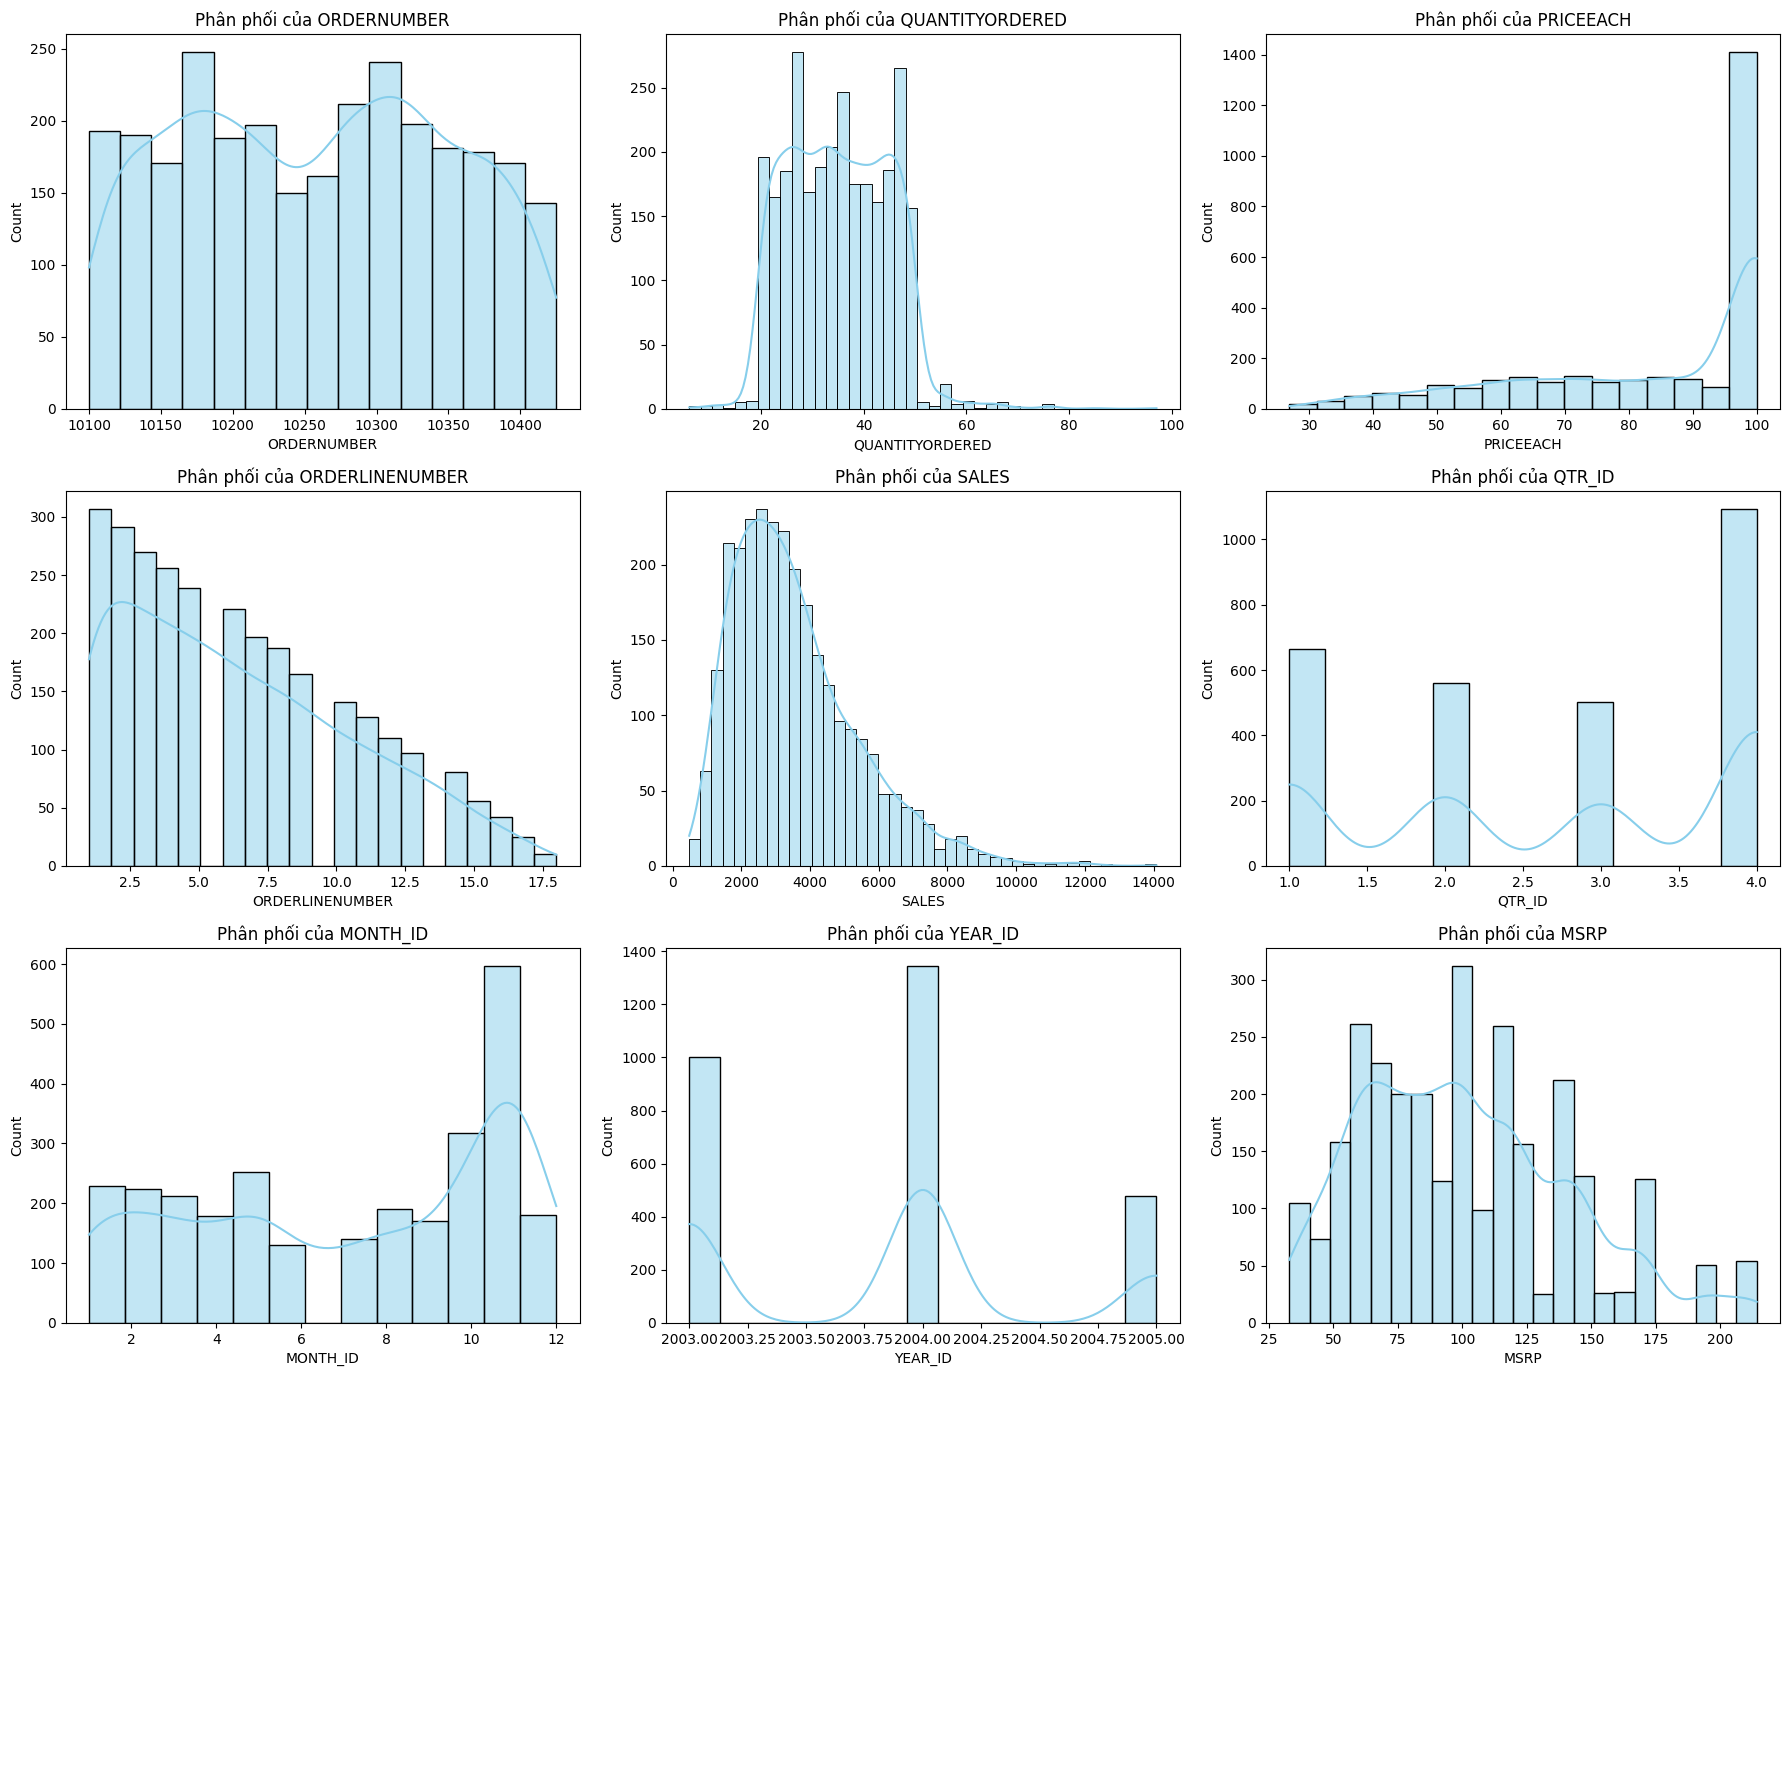

In [ ]:
# Chọn các cột số để trực quan
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# 🎯 Vẽ biểu đồ phân phối các biến số
fig, axes = plt.subplots(len(num_cols) // 3 + 1, 3, figsize=(18, 18))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Phân phối của {col}', fontsize=12)

# Nếu còn ô trống thì tắt trục
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.savefig("distribution_plots.png")
plt.show()

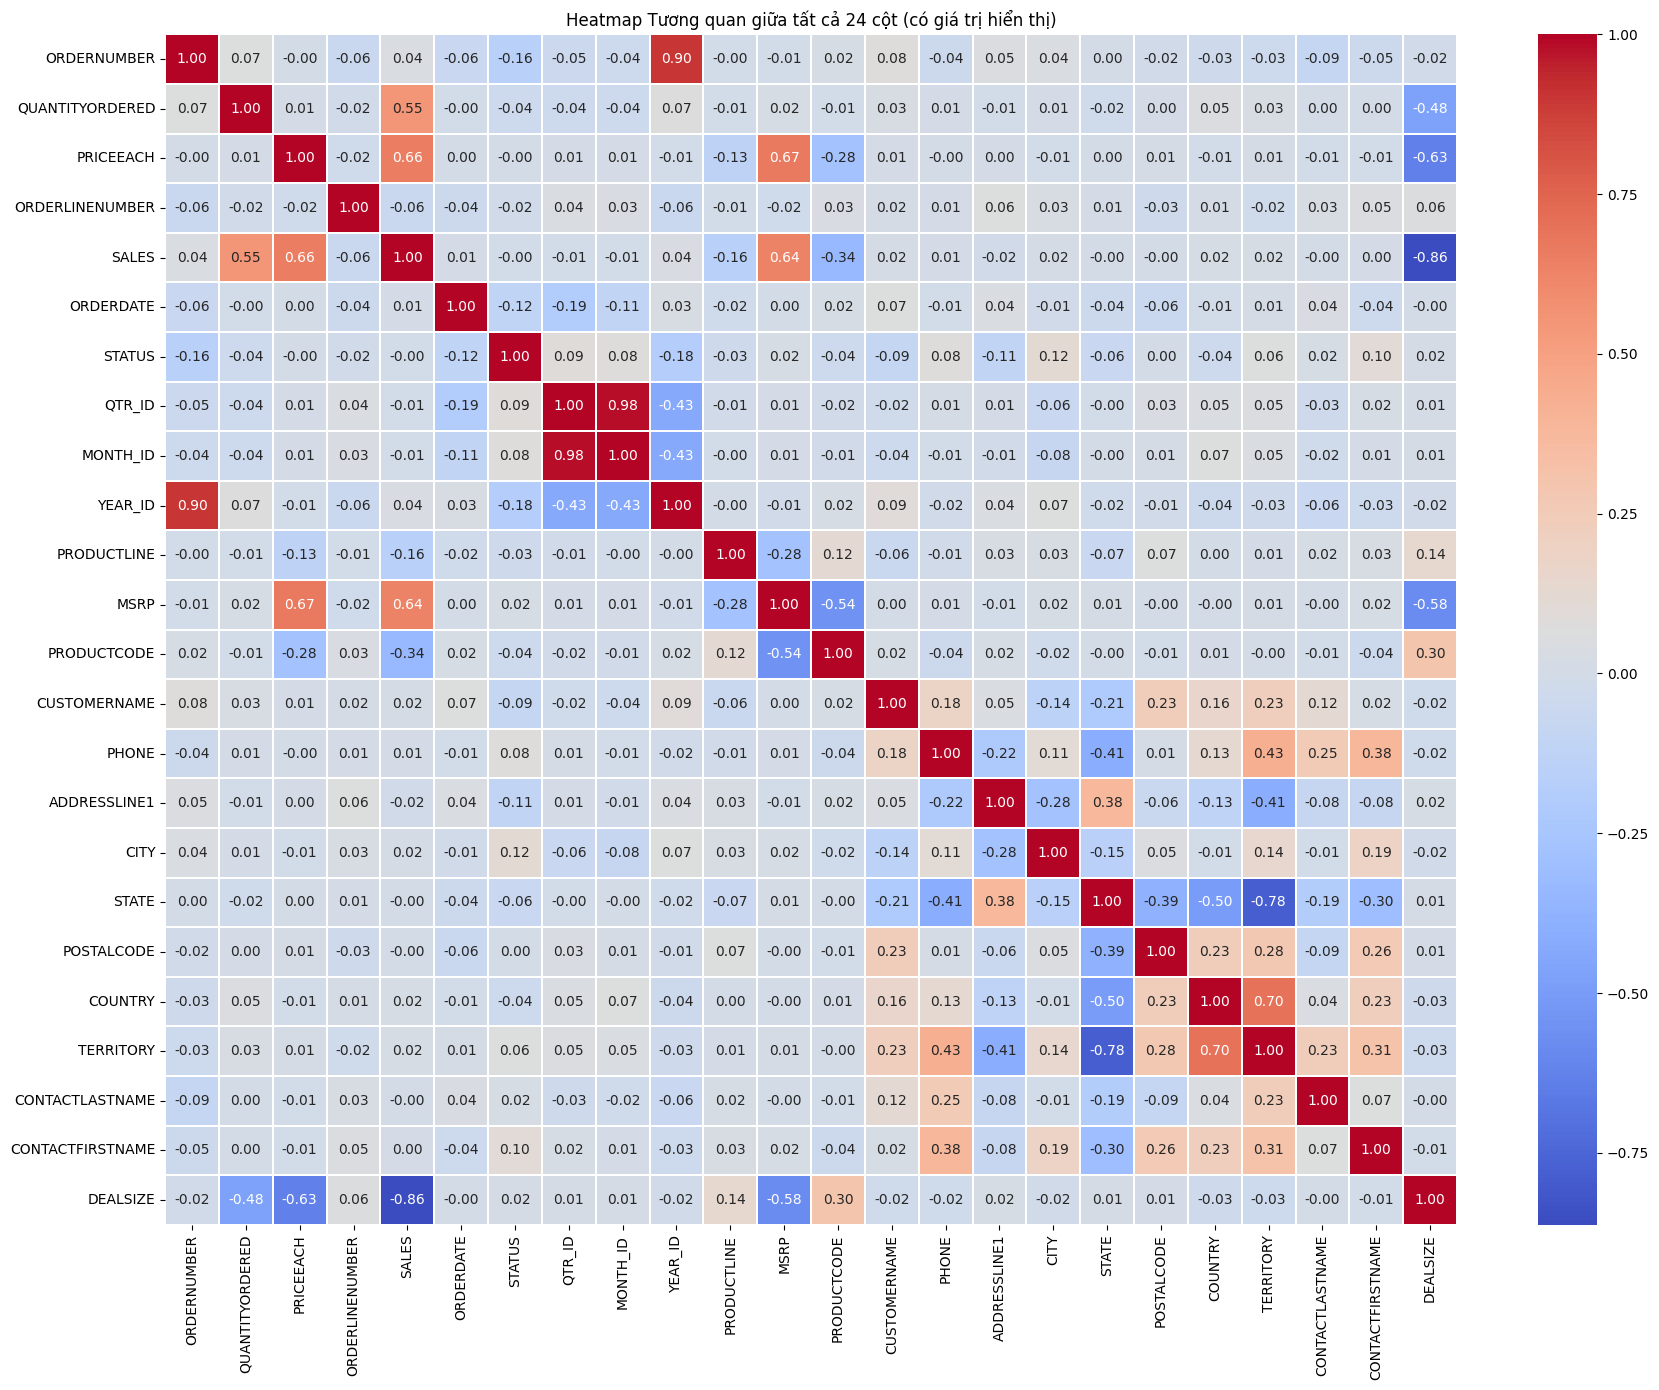

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu
df = pd.read_csv("/content/drive/MyDrive/CDCSKTCNTT/datatest/sales_data_sample.csv")

# Mã hóa các cột dạng chuỗi
df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col].astype(str))

# Tính ma trận tương quan
corr_matrix = df_encoded.corr()

# Vẽ heatmap với số hiển thị trên ô
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.3)
plt.title('Heatmap Tương quan giữa tất cả 24 cột')
plt.tight_layout()
plt.show()



**Phần 3: Chuẩn bị dữ liệu và huấn luyện mô hình**

📥 Đọc dữ liệu...

🌲 Huấn luyện mô hình Random Forest...

✅ MSE: 613027.78
✅ R² Score: 0.8596


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


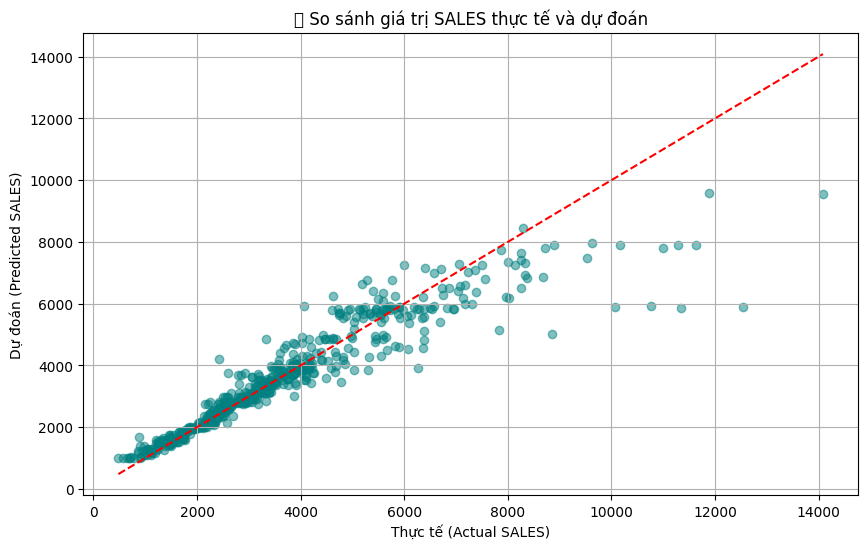

In [1]:
#Import các thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# === 1. Đọc dữ liệu ===
print("📥 Đọc dữ liệu...")
data = pd.read_csv('/content/drive/MyDrive/CDCSKTCNTT/datatest/sales_data_sample.csv')

# === 2. Loại bỏ các phần không ảnh hưởng đến nhãn ===
cols_to_drop = [
  'ORDERDATE','STATUS','PRODUCTLINE', 'PRODUCTCODE' ,'CUSTOMERNAME', 'PHONE','ADDRESSLINE1','CITY',
  'STATE','POSTALCODE','COUNTRY','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME', 'DEALSIZE']

existing_cols_to_drop = [col for col in cols_to_drop if col in data.columns]
data.drop(columns=existing_cols_to_drop, inplace=True)

# === 3. Tách X và y ===
X = data.drop(columns=['SALES'])
y = data['SALES']

# Encode các cột dạng object
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# === 4. Tách tập train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# === 5. Huấn luyện mô hình ===
print("\n🌲 Huấn luyện mô hình Random Forest...")
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42)
rf.fit(X_train, y_train)

# === 6. Dự đoán và đánh giá ===
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n✅ MSE: {mse:.2f}")
print(f"✅ R² Score: {r2:.4f}")

# === 7. Biểu đồ: Dự đoán vs Thực tế ===
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Thực tế (Actual SALES)")
plt.ylabel("Dự đoán (Predicted SALES)")
plt.title("🎯 So sánh giá trị SALES thực tế và dự đoán")
plt.grid(True)
plt.show()


**Phần 4: Tối ưu mô hình**

In [2]:
print("\n🚀 Đang thử các cấu hình mô hình Random Forest...")

best_mse = np.inf
best_params_mse = {}

best_r2 = -np.inf
best_params = {}

for n in range(50, 301, 50):          # n_estimators: 50, 100, ..., 300
    for depth in range(1, 11):        # max_depth: 1 đến 10
        rf = RandomForestRegressor(
            n_estimators=n,
            max_depth=depth,
            random_state=42
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"🌲 n_estimators={n}, max_depth={depth} --> R² = {r2:.4f} | MSE = {mse:.2f}")

        if r2 > best_r2:
            best_r2 = r2
            best_params = {'n_estimators': n, 'max_depth': depth}

        if mse < best_mse:
            best_mse = mse
            best_params_mse = {'n_estimators': n, 'max_depth': depth}

print("\n✅ Cấu hình tốt nhất theo R²:")
print(f"🔧 n_estimators = {best_params['n_estimators']}")
print(f"🔧 max_depth = {best_params['max_depth']}")
print(f"🎯 R² tốt nhất = {best_r2:.4f}")

print("\n✅ Cấu hình tốt nhất theo MSE:")
print(f"🔧 n_estimators = {best_params_mse['n_estimators']}")
print(f"🔧 max_depth = {best_params_mse['max_depth']}")
print(f"📉 MSE nhỏ nhất = {best_mse:.2f}")



🚀 Đang thử các cấu hình mô hình Random Forest...
🌲 n_estimators=50, max_depth=1 --> R² = 0.4204 | MSE = 2529918.52
🌲 n_estimators=50, max_depth=2 --> R² = 0.6709 | MSE = 1436293.04
🌲 n_estimators=50, max_depth=3 --> R² = 0.7764 | MSE = 975826.69
🌲 n_estimators=50, max_depth=4 --> R² = 0.8349 | MSE = 720461.14
🌲 n_estimators=50, max_depth=5 --> R² = 0.8590 | MSE = 615637.13
🌲 n_estimators=50, max_depth=6 --> R² = 0.8761 | MSE = 540828.76
🌲 n_estimators=50, max_depth=7 --> R² = 0.8823 | MSE = 513779.08
🌲 n_estimators=50, max_depth=8 --> R² = 0.8872 | MSE = 492523.64
🌲 n_estimators=50, max_depth=9 --> R² = 0.8894 | MSE = 482762.69
🌲 n_estimators=50, max_depth=10 --> R² = 0.8930 | MSE = 467059.86
🌲 n_estimators=100, max_depth=1 --> R² = 0.4208 | MSE = 2527950.74
🌲 n_estimators=100, max_depth=2 --> R² = 0.6702 | MSE = 1439756.88
🌲 n_estimators=100, max_depth=3 --> R² = 0.7758 | MSE = 978410.72
🌲 n_estimators=100, max_depth=4 --> R² = 0.8354 | MSE = 718601.26
🌲 n_estimators=100, max_depth=5

# Mục mới